In [1]:
import findspark

In [2]:
findspark.init('C:\spark-2.4.5-bin-hadoop2.7')

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.appName('Apple').getOrCreate()

In [5]:
df = spark.read.csv('APPLE.csv',header=True, inferSchema=True)

In [6]:
df.columns

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [7]:
df.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: integer (nullable = true)



In [8]:
for row in df.head(5):
    print(row)
    print('\n')

Row(Date=datetime.datetime(2018, 6, 25, 0, 0), Open=183.399994, High=184.919998, Low=180.729996, Close=182.169998, Adj Close=179.438583, Volume=31663100)


Row(Date=datetime.datetime(2018, 6, 26, 0, 0), Open=182.990005, High=186.529999, Low=182.539993, Close=184.429993, Adj Close=181.664673, Volume=24569200)


Row(Date=datetime.datetime(2018, 6, 27, 0, 0), Open=185.229996, High=187.279999, Low=184.029999, Close=184.160004, Adj Close=181.398743, Volume=25285300)


Row(Date=datetime.datetime(2018, 6, 28, 0, 0), Open=184.100006, High=186.210007, Low=183.800003, Close=185.5, Adj Close=182.718643, Volume=17365200)


Row(Date=datetime.datetime(2018, 6, 29, 0, 0), Open=186.289993, High=187.190002, Low=182.910004, Close=185.110001, Adj Close=182.334488, Volume=22737700)




In [9]:
df.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+--------------------+
|summary|              Open|              High|               Low|             Close|         Adj Close|              Volume|
+-------+------------------+------------------+------------------+------------------+------------------+--------------------+
|  count|               251|               251|               251|               251|               251|                 251|
|   mean|191.49438253784857|193.52362575697214| 189.5791630956174|191.61525922709157|190.09001068525902|3.2500690836653385E7|
| stddev|21.549357988573007| 21.70621169057461|21.458889559650753|21.568176963850892|21.109922267991323|1.3925256820087591E7|
|    min|        143.979996|        145.720001|             142.0|        142.190002|        141.039642|            12513900|
|    max|        230.779999|        233.470001|        229.779999|        232.070007|         229.39209|            96

In [10]:
from pyspark.sql.functions import format_number

In [11]:
result = df.describe()

In [12]:
result.select(result['summary'], 
              format_number(result['Open'].cast('float'),2).alias('Open'),
              format_number(result['High'].cast('float'),2).alias('High'),
              format_number(result['Low'].cast('float'),2).alias('Low'),
              format_number(result['Close'].cast('float'),2).alias('Close'),
              result['Volume'].cast('int').alias('Volume')).show()

+-------+------+------+------+------+--------+
|summary|  Open|  High|   Low| Close|  Volume|
+-------+------+------+------+------+--------+
|  count|251.00|251.00|251.00|251.00|     251|
|   mean|191.49|193.52|189.58|191.62|    null|
| stddev| 21.55| 21.71| 21.46| 21.57|    null|
|    min|143.98|145.72|142.00|142.19|12513900|
|    max|230.78|233.47|229.78|232.07|96246700|
+-------+------+------+------+------+--------+



In [13]:
df2 = df.withColumn("HV ration", df['High']/df['Volume'])

In [14]:
df2.select('HV ration').show()

+--------------------+
|           HV ration|
+--------------------+
|5.840236679289141E-6|
|7.592025747684092E-6|
|7.406674985070377E-6|
|1.072317088199387...|
|8.232582978929268E-6|
| 1.05632414430978E-5|
|1.346848374752773...|
|1.122667782850122...|
|1.077654204698831E-5|
|9.651457892552362E-6|
|1.200067751629640...|
|1.007779513049942...|
|1.060966371230135...|
|1.533015255036399...|
|1.280653548803105...|
|1.235121793427532...|
|1.169983060255956...|
|9.491393566259834E-6|
| 9.30683554037976E-6|
|1.200545405080866E-5|
+--------------------+
only showing top 20 rows



In [15]:
df.orderBy(df['High'].desc()).head(1)[0][0]

datetime.datetime(2018, 10, 3, 0, 0)

In [16]:
from pyspark.sql.functions import mean

In [17]:
df.select(mean('Close')).show()

+------------------+
|        avg(Close)|
+------------------+
|191.61525922709157|
+------------------+



In [18]:
from pyspark.sql.functions import max,min

In [19]:
df.select(max('Volume'),min('Volume')).show()

+-----------+-----------+
|max(Volume)|min(Volume)|
+-----------+-----------+
|   96246700|   12513900|
+-----------+-----------+



In [20]:
from pyspark.sql.functions import corr

In [21]:
df.select(corr('High','Volume')).show()

+--------------------+
|  corr(High, Volume)|
+--------------------+
|-0.09397261622724815|
+--------------------+



In [22]:
from pyspark.sql.functions import year

In [23]:
yeardf = df.withColumn('Year',year(df['Date']))

In [24]:
max_df = yeardf.groupBy('Year').max()

In [25]:
max_df.select('Year', 'max(High)').show()

+----+----------+
|Year| max(High)|
+----+----------+
|2018|233.470001|
|2019|215.309998|
+----+----------+



In [26]:
from pyspark.sql.functions import month

In [27]:
monthdf = df.withColumn('Month', month('Date'))

In [28]:
monthavga = monthdf.select('Month','Close').groupBy('Month').mean()

In [29]:
monthavga.select('Month','avg(Close)').orderBy('Month').show()

+-----+------------------+
|Month|        avg(Close)|
+-----+------------------+
|    1|         154.16619|
|    2| 171.7278932631579|
|    3|183.29381014285713|
|    4|200.51619104761903|
|    5|191.27363659090906|
|    6| 189.8914279047619|
|    7|190.31142904761901|
|    8|213.34608852173915|
|    9| 222.0736854210526|
|   10|220.84565204347825|
|   11|191.23571409523808|
|   12|164.26631715789475|
+-----+------------------+



In [30]:
import pandas as pd

In [31]:
import matplotlib.pyplot as plt

In [32]:
apple = pd.read_csv("APPLE.csv")

In [33]:
print(apple.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2018-06-25  183.399994  184.919998  180.729996  182.169998  179.438583   
1  2018-06-26  182.990005  186.529999  182.539993  184.429993  181.664673   
2  2018-06-27  185.229996  187.279999  184.029999  184.160004  181.398743   
3  2018-06-28  184.100006  186.210007  183.800003  185.500000  182.718643   
4  2018-06-29  186.289993  187.190002  182.910004  185.110001  182.334488   

     Volume  
0  31663100  
1  24569200  
2  25285300  
3  17365200  
4  22737700  


In [34]:
# 열 이름 변경하기
apple.rename(columns={'Adj Close':'AdjClose'}, inplace=True)

In [35]:
# 날짜(Date) 열을 Timestamp로 변환하고, 데이터프레임 인덱스로 지정하기
apple['Date'] = pd.to_datetime(apple['Date'])
apple.set_index('Date', inplace=True)
print(apple.head())

                  Open        High         Low       Close    AdjClose  \
Date                                                                     
2018-06-25  183.399994  184.919998  180.729996  182.169998  179.438583   
2018-06-26  182.990005  186.529999  182.539993  184.429993  181.664673   
2018-06-27  185.229996  187.279999  184.029999  184.160004  181.398743   
2018-06-28  184.100006  186.210007  183.800003  185.500000  182.718643   
2018-06-29  186.289993  187.190002  182.910004  185.110001  182.334488   

              Volume  
Date                  
2018-06-25  31663100  
2018-06-26  24569200  
2018-06-27  25285300  
2018-06-28  17365200  
2018-06-29  22737700  


In [36]:
# 열 추가 - 다음 날 종가 (1일 전 수정 주가)
apple['PriceLag1'] = apple['AdjClose'].shift(-1)

# 열 추가 - 주가 변동 (오늘 종가 대비 내일 종가: 오늘 주식 홀딩하는 경우, 내일 기대 수익)
apple['PriceDiff'] = apple['PriceLag1'] - apple['AdjClose']

# 열 추가 - 주가 변동율(%) : 주식 홀딩하는 경우 다음 날 기대 수익률
apple['DailyReturn'] = apple['PriceDiff'] / apple['AdjClose']

# 열 추가 - 주가 상승은 1로, 주가 하락(또는 보합)은 0으로 지정
apple['UpDown'] = [1 if apple['DailyReturn'].loc[date] > 0 else 0 for date in apple.index] 

# 5개의 열을 선택하여 새로운 데이터프레임으로 저장하기
apple_chart_data = apple[['AdjClose', 'PriceLag1', 'PriceDiff', 'DailyReturn', 'UpDown']]
print(apple_chart_data.head())

              AdjClose   PriceLag1  PriceDiff  DailyReturn  UpDown
Date                                                              
2018-06-25  179.438583  181.664673   2.226090     0.012406       1
2018-06-26  181.664673  181.398743  -0.265930    -0.001464       0
2018-06-27  181.398743  182.718643   1.319900     0.007276       1
2018-06-28  182.718643  182.334488  -0.384155    -0.002102       0
2018-06-29  182.334488  184.373459   2.038971     0.011183       1


In [37]:
# 주가 상승일, 하락일의 수를 계산하기
# 상승 1 , 하락 0
apple['UpDown'].value_counts()

1    140
0    111
Name: UpDown, dtype: int64

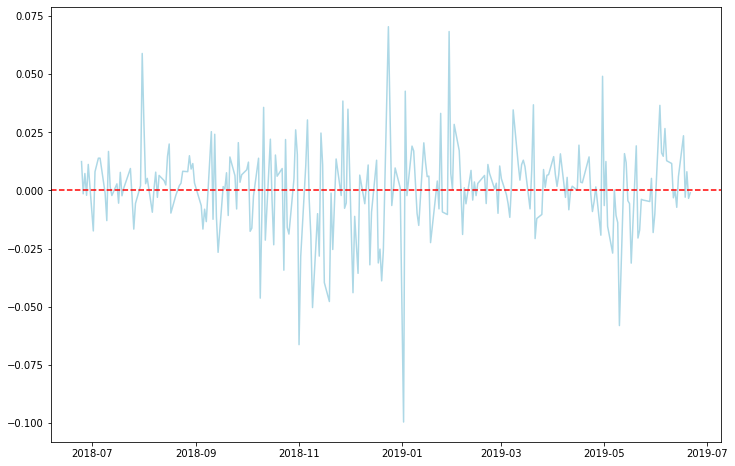

In [38]:
# matplotlib의 plot() 함수를 사용하여 주가 변동율 차트 그리기 
plt.figure(figsize=(12,8))
plt.plot(apple.index, apple['DailyReturn'], color='lightblue')
plt.axhline(y=0, color='red', ls='--')
plt.show()

In [39]:
#참고 
#https://m.blog.naver.com/BlogTagView.nhn?blogId=okkam76&pushNavigation=true&tagName=matplotlib
#https://finance.yahoo.com/quote/AAPL?p=AAPL&.tsrc=fin-srch
#https://wendys.tistory.com/174
#https://wendys.tistory.com/173